In [1]:
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# File to Load (Remember to change these)
city_data_to_load = "data/city_data.csv"
ride_data_to_load = "data/ride_data.csv"

# Read the City and Ride Data
city_data_to_read = pd.read_csv(city_data_to_load)
ride_data_to_read = pd.read_csv(ride_data_to_load)

# Combine the data into a single dataset
combined = pd.merge(ride_data_to_read,city_data_to_read,on='city')
# Display the data table for preview
combined.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2018-01-14 10:14:22,13.83,5739410935873,5,Urban
1,Lake Jonathanshire,2018-04-07 20:51:11,31.25,4441251834598,5,Urban
2,Lake Jonathanshire,2018-03-09 23:45:55,19.89,2389495660448,5,Urban
3,Lake Jonathanshire,2018-04-07 18:09:21,24.28,7796805191168,5,Urban
4,Lake Jonathanshire,2018-01-02 14:14:50,13.89,424254840012,5,Urban


## Bubble Plot of Ride Sharing Data

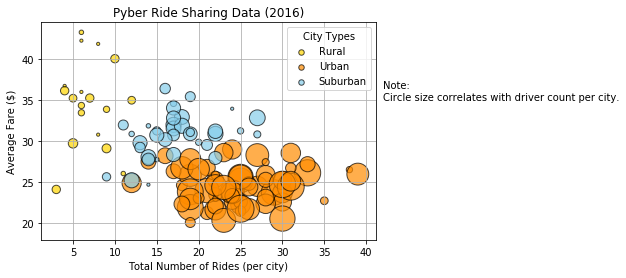

In [21]:
# Obtain the x and y coordinates for each of the three city types

# [ X Coordinates]: the below code generates the number of rides for each city by city type
#Total number of rides per city, per type of city
groupby_type = combined.groupby(['type','city'])['ride_id'].count()
df_type = pd.DataFrame(groupby_type)
#extract sub-dataframes for each of the three city types
rural_df = df_type.loc['Rural','ride_id']
urban_df = df_type.loc['Urban','ride_id']
suburban_df = df_type.loc['Suburban','ride_id']
# df['column_name'].tolist() extracts data points under specified column name and puts them into a list defined by variable name
rural_x = rural_df.tolist()
urban_x = urban_df.tolist()
suburban_x = suburban_df.tolist()


# [ Y Coordinates]: the below code generates the average fare for each city by city type
#Average fare per city, per type of city
groupby_type_fare = combined.groupby(['type','city'])['fare'].mean()
df_type_fare = pd.DataFrame(groupby_type_fare)
#extract sub-dataframes for each of the three city types
rural_fare_df = df_type_fare.loc['Rural','fare']
urban_fare_df = df_type_fare.loc['Urban','fare']
suburban_fare_df = df_type_fare.loc['Suburban','fare']
# df['column_name'].tolist() extracts data points under specified column name and puts them into a list defined by variable name
rural_y = rural_fare_df.tolist()
urban_y = urban_fare_df.tolist()
suburban_y = suburban_fare_df.tolist()

#[BUBBLE SIZES]: the below code is generated to determine the size of the bubbles in the scatter plot
#driver count per city per type of city
groupby_type_driver = combined.groupby(['type','city'])['driver_count'].mean()
df_type_driver = pd.DataFrame(groupby_type_driver)
#extract sub-dataframes for each of the three city types
rural_driver_df = df_type_driver.loc['Rural','driver_count']
urban_driver_df = df_type_driver.loc['Urban','driver_count']
suburban_driver_df = df_type_driver.loc['Suburban','driver_count']
# df['column_name'].tolist() extracts data points under specified column name and puts them into a list defined by variable name
rural_s = rural_driver_df.tolist()
urban_s = urban_driver_df.tolist()
suburban_s = suburban_driver_df.tolist()


# Build the scatter plots for each city types
rural_size = [x*10 for x in rural_s]
urban_size = [x*10 for x in urban_s]
suburban_size = [x*10 for x in suburban_s]

# Incorporate the other graph properties
rural = plt.scatter(rural_x, rural_y, s=rural_size, marker="o", alpha = 0.7, color ="gold", linewidth=1, edgecolors="black")
urban = plt.scatter(urban_x, urban_y,s=urban_size, marker="o", alpha = 0.7, color ="darkorange", linewidth=1, edgecolors="black")
suburban = plt.scatter(suburban_x, suburban_y, s=suburban_size, marker="o", alpha = 0.7, color ="skyblue", linewidth=1, edgecolors="black")
plt.grid()
plt.xlabel("Total Number of Rides (per city)")
plt.ylabel("Average Fare ($)")
plt.title("Pyber Ride Sharing Data (2016)")

# Create a legend
legend = plt.legend(('Rural', 'Urban', 'Suburban'),loc='upper right',title="City Types")
#>>Manually adjusts the marker sizes in the legend to a fixed size without affecting the scatter plot markers (citation: https://stackoverflow.com/questions/24706125/setting-a-fixed-size-for-points-in-legend)
#var_name_for_legend = legendhandles[index_number]._sizes = [size value]
legend.legendHandles[0]._sizes = [30]
legend.legendHandles[1]._sizes = [30]
legend.legendHandles[2]._sizes = [30]

# Incorporate a text label regarding circle size
#textstr: holds the text string; [\n] moves string following it on to the next line in the output
textstr = ("Note:\nCircle size correlates with driver count per city.")
#plt.txt(latitude value, longitude value, text string, font size)
plt.text(42, 35, textstr, fontsize=10)

# Save Figure/ bbox_inches is a parameter that tries to capture the entire picture if given the value "tight"
plt.savefig("../Pyber/EL_pyber_ride_sharing_data.png", bbox_inches="tight")
plt.show()

In [24]:
# Show plot
plt.show()

## Total Fares by City Type

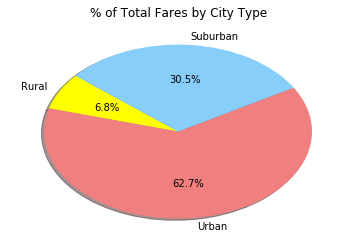

In [60]:
# Calculate Type Percents
sum_type_fare_gb = combined.groupby(['type','city'])['fare'].sum()
df_type_fare_sum = pd.DataFrame(sum_type_fare_gb)
#extract sub-dataframes for each of the three city types
rural_fare_sum_df = df_type_fare_sum.loc['Rural','fare']
urban_fare_sum_df = df_type_fare_sum.loc['Urban','fare']
suburban_fare_sum_df = df_type_fare_sum.loc['Suburban','fare']
# df['column_name'].tolist() extracts data points under specified column name and puts them into a list defined by variable name
rural_sum_list = rural_fare_sum_df.tolist()
urban_sum_list = urban_fare_sum_df.tolist()
suburban_sum_list = suburban_fare_sum_df.tolist()

sum_rural = sum(rural_sum_list)
sum_urban = sum(urban_sum_list)
sum_suburban = sum(suburban_sum_list)

total_fares = sum_rural + sum_urban + sum_suburban
rural_percent = (sum_rural/total_fares)*100
urban_percent = (sum_urban/total_fares)*100
suburban_percent = (sum_suburban/total_fares)*100



# Build Pie Chart
# Labels for the sections of our pie chart
labels = ["Rural","Urban","Suburban"]
# The values of each section of the pie chart
percent_list = [rural_percent, urban_percent, suburban_percent]
# The colors of each section of the pie chart
colors = ["yellow", "lightcoral", "lightskyblue"]
# Tells matplotlib to seperate the "Python" section from the others
explode = (0, 0, 0)


plt.pie(percent_list, explode=explode, colors=colors,labels=labels, autopct="%1.1f%%", shadow=True, startangle=140)
plt.title("% of Total Fares by City Type")
# Save Figure
plt.savefig("../Pyber/EL_total_fares_citytype_pie.png", bbox_inches="tight")


In [51]:
# Show Figure
plt.show()

## Total Rides by City Type

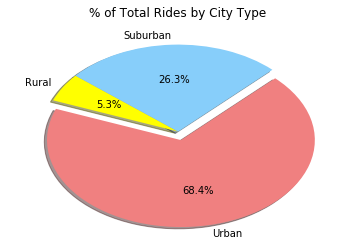

In [61]:
# Calculate Ride Percents
rural_ride_sum = sum(rural_x)
urban_ride_sum = sum(urban_x) 
suburban_ride_sum = sum(suburban_x)
total_rides = rural_ride_sum + urban_ride_sum + suburban_ride_sum
rural_ride_perc = (rural_ride_sum/total_rides)*100
urban_ride_perc = (urban_ride_sum/total_rides)*100
suburban_ride_perc = (suburban_ride_sum/total_rides)*100

# Build Pie Chart
# Labels for the sections of our pie chart
labels = ["Rural","Urban","Suburban"]
# The values of each section of the pie chart
ride_percent_list = [rural_ride_perc,urban_ride_perc, suburban_ride_perc]
# The colors of each section of the pie chart
colors = ["yellow", "lightcoral", "lightskyblue"]
# Tells matplotlib to seperate the "Python" section from the others
explode = (0, 0.1, 0)

plt.pie(ride_percent_list, explode=explode, colors=colors,labels=labels, autopct="%1.1f%%", shadow=True, startangle=140)
plt.title("% of Total Rides by City Type")

# Save Figure
plt.savefig("../Pyber/EL_total_ride_citytype_pie.png", bbox_inches="tight")

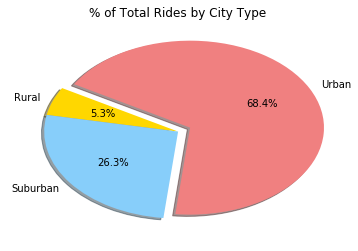

In [5]:
# Show Figure
plt.show()

## Total Drivers by City Type

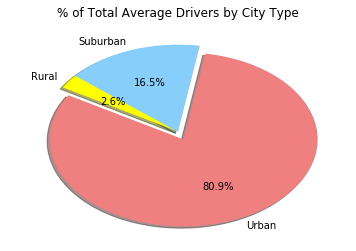

In [79]:
# Calculate Driver Percents
groupby_driver_avg = combined.groupby(['type','city'])['driver_count'].mean()
df_drivers_avg = pd.DataFrame(groupby_driver_avg)
#extract sub-dataframes for each of the three city types
rural_driver_avg = df_drivers_avg.loc['Rural','driver_count']
urban_driver_avg = df_drivers_avg.loc['Urban','driver_count']
suburban_driver_avg = df_drivers_avg.loc['Suburban','driver_count']
# df['column_name'].tolist() extracts data points under specified column name and puts them into a list defined by variable name
rural_driverlist = rural_driver_avg.tolist()
urban_driverlist = urban_driver_avg.tolist()
suburban_driverlist = suburban_driver_avg.tolist()

#sum of each list
rural_drivers_totalavg = sum(rural_driverlist)
urban_drivers_totalavg = sum(urban_driverlist)
suburban_drivers_totalavg = sum(suburban_driverlist)

all_drivers = rural_drivers_totalavg + urban_drivers_totalavg + suburban_drivers_totalavg
percentage_ruraldriver = (rural_drivers_totalavg/all_drivers)*100
percentage_urbandriver = (urban_drivers_totalavg/all_drivers)*100
percentage_suburbandriver = (suburban_drivers_totalavg/all_drivers)*100

# Build Pie Charts
# Labels for the sections of our pie chart
labels = ["Rural","Urban","Suburban"]
# The values of each section of the pie chart
driver_percent_list = [percentage_ruraldriver,percentage_urbandriver, percentage_suburbandriver]
# The colors of each section of the pie chart
colors = ["yellow", "lightcoral", "lightskyblue"]
# Tells matplotlib to seperate the "Python" section from the others
explode = (0, 0.1, 0)

plt.pie(driver_percent_list, explode=explode, colors=colors,labels=labels, autopct="%1.1f%%", shadow=True, startangle=140)
plt.title("% of Total Average Drivers by City Type")

# Save Figure
plt.savefig("../Pyber/EL_total_avgdriver_citytype_pie.png", bbox_inches="tight")

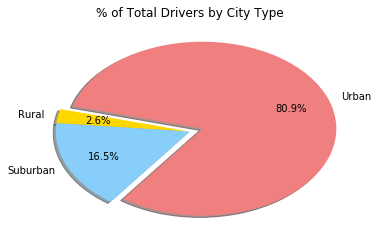

In [6]:
# Show Figure
plt.show()